In [13]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras_preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import joblib

In [15]:
#train_dir="../input/face_recognition_dataset/Original_Images/Original_Images/"
#train_dir="/home/meatisdelicious/DetectionVisage/DetectionVisage/FaceDetectionV4/input/face_recognition_dataset/Original_Images/Original_Images/"
#Unmodified Dataset
train_dir="input/face_recognition_dataset/Original_Images/Original_Images"
/home/meatisdelicious/DetectionVisage/DetectionVisage/FaceDetectionV4/face_recognition_dataset/Original_Images
#Modified Dataset
#train_dir="input/face_recognition_dataset/Original_Images_more/"

# Quand on a une classification à faire.
generator = ImageDataGenerator()
#seed : melange tjr de la meme manière le dataset à partir du meme argument
dataset = tf.keras.utils.image_dataset_from_directory(train_dir,image_size=(224, 224),batch_size=32, shuffle=True, seed=123)
dataset_size = len(dataset)
train_test_split=0.8
train_ds=dataset.take(int(train_test_split*dataset_size))
test_ds=dataset.skip(int(train_test_split*dataset_size))

classes = dataset.class_names

NotFoundError: Could not find directory input/face_recognition_dataset/Original_Images/Original_Images

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(classes),activation='softmax'))

In [ ]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics=['binary_accuracy', 'categorical_accuracy'])
    #metrics = ["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 batch_normalization_10 (Bat  (None, 111, 111, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                      

In [ ]:
#history = model.fit(train_ds,epochs= 30, batch_size=32)
history = model.fit(train_ds,epochs= 15, batch_size=32, validation_data=test_ds)

Epoch 1/15
53/64 [=======================>......] - ETA: 1:03 - loss: 3.5150 - binary_accuracy: 0.0171 - categorical_accuracy: 0.0059

InvalidArgumentError: Graph execution error:

Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_7562]

In [ ]:
# Saving Model
filename = 'model2_original_more_dataset.hdf5'
joblib.dump(history, filename)

In [ ]:
# load the model from disk
model_saved = joblib.load(filename)

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-01-01 23:18:36         8355
metadata.json                                  2023-01-01 23:18:36           64
variables.h5                                   2023-01-01 23:18:36      3059096
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......batch_normalization
.........vars
............0
............1
............2
............3
......batch_normalization_1
.........vars
............0
............1
............2
............3
......batch_normalization_2
.........vars
............0
............1
............2
............3
......batch_normalization_3
.........vars
............0
............1
............2
............3
......batch_normalization_4
.........vars
............0
............1
............2
............3
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
...

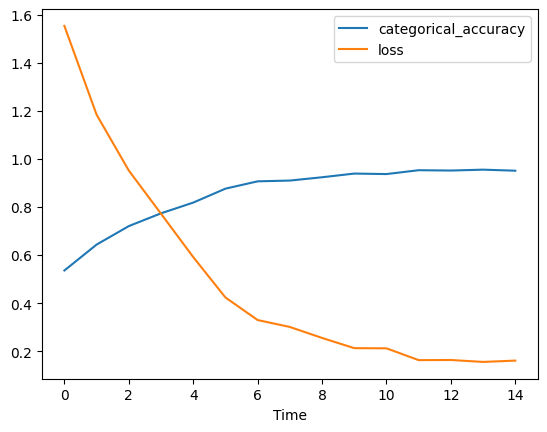

In [ ]:
plt.plot(model_saved.history['categorical_accuracy'])
plt.plot(model_saved.history['loss'])
plt.xlabel('Time')
plt.legend(['categorical_accuracy', 'loss'])
plt.show()

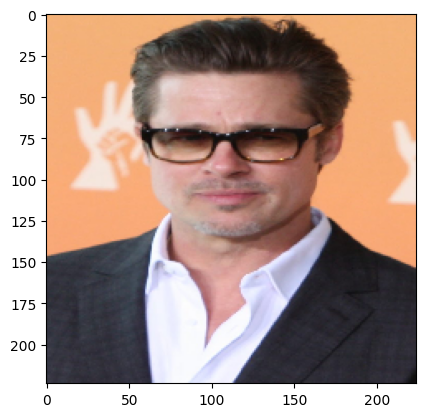

1/1 [==============================] - 1s 1s/step
Actual result: Brad Pitt
Predicted result: Tom Cruise


In [ ]:
from sklearn.metrics import accuracy_score

def predict_image(image_path):
    img = image.load_img(image_path, target_size=(224,224,3))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    
    pred = model.predict(images, batch_size=32)
    
    # Prediction accuracy
    #--> le pb que j'arrive pas à resoudre est ici
    print("Score:",(np.argmax(pred)),"%")
    model.evaluate(test_ds)

    print("Actual result: "+(image_path.split("/")[-1]).split("_")[0])
    print("Predicted result: "+classes[np.argmax(pred)])

predict_image("/home/meatisdelicious/DetectionVisage/DetectionVisage/FaceDetectionV4/input/face_recognition_dataset/Original_Images/Original_Images/Brad Pitt/Brad Pitt_103.jpg")

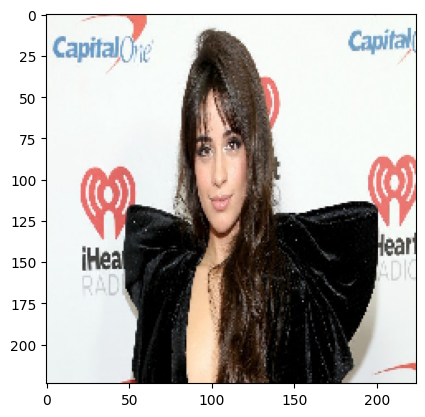

1/1 [==============================] - 0s 50ms/step
Actual result: Camila Cabello
Predicted result: Kashyap


In [ ]:
predict_image("/home/meatisdelicious/DetectionVisage/DetectionVisage/FaceDetectionV4/input/face_recognition_dataset/Original_Images/Original_Images/Camila Cabello/Camila Cabello_47.jpg")